In [ ]:
# Identify regions that are unique to each cancer and count them


In [1]:
import pandas as pd
import numpy as np
from collections import Counter

from venn import venn, pseudovenn
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [68]:
df_COAD = pd.read_csv(open("./cancers/COAD_met_region_averages.csv","r"))
df_COAD.set_index("Unnamed: 0", drop=True, inplace=True)
df_COAD.columns = ["COAD"]*len(df_COAD.columns)
df_COAD.head()

df_READ = pd.read_csv(open("./cancers/READ_met_region_averages.csv","r"))
df_READ.set_index("Unnamed: 0", drop=True, inplace=True)
df_READ.columns = ["READ"]*len(df_READ.columns)
df_READ.head()

df_LUAD = pd.read_csv(open("./cancers/LUAD_met_region_averages.csv","r"))
df_LUAD.set_index("Unnamed: 0", drop=True, inplace=True)
df_LUAD.columns = ["LUAD"]*len(df_LUAD.columns)
df_LUAD.head()

df_LUSC = pd.read_csv(open("./cancers/LUSC_met_region_averages.csv","r"))
df_LUSC.set_index("Unnamed: 0", drop=True, inplace=True)
df_LUSC.columns = ["LUSC"]*len(df_LUSC.columns)
df_LUSC.head()

df_LIHC = pd.read_csv(open("./cancers/LIHC_met_region_averages.csv","r"))
df_LIHC.set_index("Unnamed: 0", drop=True, inplace=True)
df_LIHC.columns = ["LIHC"]*len(df_LIHC.columns)
df_LIHC.head()

df_PAAD = pd.read_csv(open("./cancers/PAAD_met_region_averages.csv","r"))
df_PAAD.set_index("Unnamed: 0", drop=True, inplace=True)
df_PAAD.columns = ["PAAD"]*len(df_PAAD.columns)
df_PAAD.head()

df_PRAD = pd.read_csv(open("./cancers/PRAD_met_region_averages.csv","r"))
df_PRAD.set_index("Unnamed: 0", drop=True, inplace=True)
df_PRAD.columns = ["PRAD"]*len(df_PRAD.columns)
df_PRAD.head()

df_BRCA = pd.read_csv(open("./cancers/BRCA_met_region_averages.csv","r"))
df_BRCA.set_index("Unnamed: 0", drop=True, inplace=True)
df_BRCA.columns = ["BRCA"]*len(df_BRCA.columns)
df_BRCA.head()

df_OV = pd.read_csv(open("./cancers/BRCA_met_region_averages.csv","r"))
df_OV.set_index("Unnamed: 0", drop=True, inplace=True)
df_OV.columns = ["OV"]*len(df_OV.columns)
df_OV.head()

,OV,OV,OV,OV,OV,OV,OV,OV,OV,OV,...,OV,OV,OV,OV,OV,OV,OV,OV,OV,OV
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
chr1:1427560:1427904,0.038086,0.016333,0.023023,0.026174,0.019562,0.017448,0.021837,0.020956,0.022475,0.023064,...,0.027276,0.027678,0.024362,0.025876,0.026341,0.020973,0.026137,0.026440,0.022771,0.023612
chr1:3068460:3069278,0.075226,0.043381,0.153694,0.111342,0.139614,0.086615,0.191380,0.265520,0.155679,0.493302,...,0.165633,0.362284,0.479024,0.078009,0.062337,0.044670,0.185405,0.048512,0.314688,0.065119
chr1:3070602:3070974,0.219512,0.168161,0.373718,0.129270,0.460405,0.143322,0.553019,0.075641,0.223886,0.420385,...,0.343659,0.396167,0.474868,0.141042,0.118110,0.168307,0.235971,0.075959,0.286295,0.496397
chr1:4653898:4654475,0.622075,0.736771,0.713070,0.361341,0.647109,0.117472,0.542215,0.674522,0.624370,0.481414,...,0.440722,0.483497,0.550640,0.278167,0.501958,0.337959,0.579183,0.454121,0.248036,0.531303
chr1:4654485:4656643,0.059736,0.055407,0.150075,0.118825,0.404857,0.058128,0.220761,0.116831,0.225158,0.311227,...,0.282758,0.157928,0.208970,0.062506,0.070784,0.088359,0.277327,0.276103,0.114373,0.322695


In [69]:
df_COAD_READ = pd.concat([df_COAD.astype(float), df_READ.astype(float)], join="inner", axis=1)
scores  = [ (sum(np.array(x)>0.3)/len(x))>=0.8 for i, x in df_COAD_READ.iterrows()]
df_COAD_READ_markers = np.array(df_COAD_READ.index)[scores]

# df_READ = df_READ.astype(float)
# scores  = [ sum(np.array(x)>0.2)>=0.75 for i, x in df_READ.iterrows()]
# df_READ_markers = np.array(df_READ.index)[scores]

df_PRAD = df_PRAD.astype(float)
scores  = [ (sum(np.array(x)>0.3)/len(x))>=0.8 for i, x in df_PRAD.iterrows()]
df_PRAD_markers = np.array(df_PRAD.index)[scores]

df_PAAD = df_PAAD.astype(float)
scores  = [ (sum(np.array(x)>0.3)/len(x))>=0.8 for i, x in df_PAAD.iterrows()]
df_PAAD_markers = np.array(df_PAAD.index)[scores]

df_LUSC_LUAD = pd.concat([df_LUSC.astype(float),df_LUAD.astype(float)],join="inner",axis=1)
scores  = [ (sum(np.array(x)>0.3)/len(x))>=0.8 for i, x in df_LUSC_LUAD.iterrows()]
df_LUSC_LUAD_markers = np.array(df_LUSC_LUAD.index)[scores]

df_OV = df_OV.astype(float)
scores  = [ (sum(np.array(x)>0.3)/len(x))>=0.8 for i, x in df_OV.iterrows()]
df_OV_markers = np.array(df_OV.index)[scores]

df_BRCA = df_BRCA.astype(float)
scores  = [ (sum(np.array(x)>0.3)/len(x))>=0.8 for i, x in df_BRCA.iterrows()]
df_BRCA_markers = np.array(df_BRCA.index)[scores]

df_LIHC = df_LIHC.astype(float)
scores  = [ (sum(np.array(x)>0.3)/len(x))>=0.8 for i, x in df_LIHC.iterrows()]
df_LIHC_markers = np.array(df_LIHC.index)[scores]

In [66]:
biomarkers = { "COAD/READ": set(df_COAD_READ_markers), 
              "PRAD":set(df_PRAD_markers),
             "PAAD": set(df_PAAD_markers),
             "LUSC/LUAD" : set(df_LUSC_LUAD_markers),
             #"OV": set(df_OV_markers),
             "BRCA": set(df_BRCA_markers),
             "LIHC": set(df_LIHC_markers)}


In [ ]:
pseudovenn(biomarkers)
#plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

In [2]:
#meteline

df_met = pd.read_csv(open("/home/billiegould/src/Methyl/Meteline/5cpg_tissue_vs_plasma/Meteline_tissue_vs_plasma_top_signif_HMRs.bed","r"), sep="\t")

df_met.head()

,chr,start,stop,q-value,mean methylation difference,#CpGs,p (MWU),p (2D KS),mean g1,mean g2,size,CpG_density
0,chr7,2733901,2734582,0.0,-0.690660,26,0.0,0.0,0.146000,0.83666,681,0.038179
1,chr12,123034050,123034612,0.0,-0.647630,25,0.0,0.0,0.085048,0.73268,562,0.044484
2,chr2,156329059,156330828,0.0,-0.635468,87,0.0,0.0,0.074992,0.71046,1769,0.049180
3,chr13,112873757,112874535,0.0,-0.635294,39,0.0,0.0,0.071915,0.70721,778,0.050129
4,chr8,143326053,143326514,0.0,-0.635027,28,0.0,0.0,0.141210,0.77624,461,0.060738


In [3]:
df_met_healthy = df_met[[x <=0.01 for x in df_met["mean g1"]]]


In [5]:
import seaborn as sns

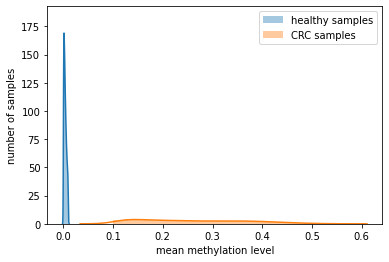

In [10]:
sns.distplot(df_met_healthy["mean g1"], label="healthy samples")
sns.distplot(df_met_healthy["mean g2"], label="CRC samples")
plt.ylabel("number of samples")
plt.xlabel("mean methylation level")
plt.legend()